In [9]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

from mavi.numpy.vanishing_ideal import VanishingIdeal
from sympy.abc import x, y

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
Y = np.sin(2*np.pi*np.arange(0, 100)/100)

# 問題
二つの基底はほとんどの場合それぞれx軸, y軸に平行なものが出てくるが，希にそうでないものが出てくる．

i = 8, y = 0.4817536741017153
g0 = -0.894427190552702*x - 0.447213595276351*y + 1.10987398318532
g1 = 0.447213595276351*x - 0.894427190552702*y - 0.0163200100111118


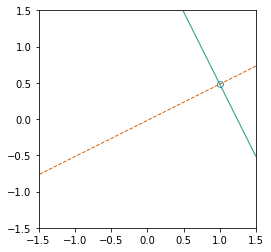

i = 68, y = -0.9048270524660198
g0 = -0.707106780832994*x + 0.707106780832994*y + 1.34691612511285
g1 = -0.707106780832994*x - 0.707106780832994*y + 0.0672974365531402


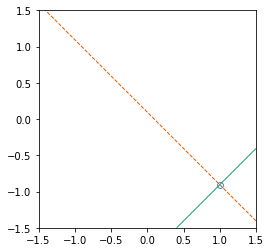

In [31]:
method = 'grad'
eps = 1e-6
chechpoints = [8, 68]

for i, Y_ in enumerate(Y):
    X = np.array([[1.0, Y_]])
    
    if i in chechpoints:
        vi = VanishingIdeal()
        vi.fit(X, eps, method=method)  # grad normalization
        Gs = vi.evaluate(np.array([[x,y]]), target='vanishing')

        print(f'i = {i}, y = {Y_}')
        for j, g in enumerate(Gs[0]):
            print(f'g{j} = {g}')
        
        vi.plot(X, splitshow=False)
        plt.show()

i = 8, y = 0.4817536741017153
g0 = 1.0*x - 1.0
g1 = 1.0*y - 0.481753674101715


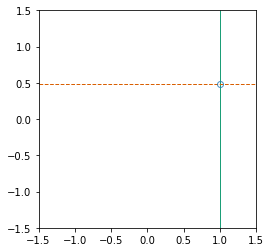

i = 68, y = -0.9048270524660198
g0 = 1.0*x - 1.0
g1 = 1.0*y + 0.90482705246602


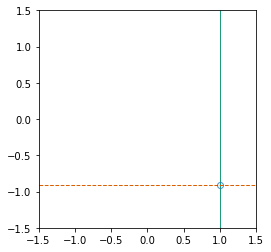

In [13]:
method = 'vca'
eps = 1e-6
chechpoints = [8, 68]

for i, Y_ in enumerate(Y):
    X = np.array([[1.0, Y_]])
    
    if i in chechpoints:
        vi = VanishingIdeal()
        vi.fit(X, eps, method=method)  # grad normalization
        Gs = vi.evaluate(np.array([[x,y]]), target='vanishing')

        print(f'i = {i}, y = {Y_}')
        for j, g in enumerate(Gs[0]):
            print(f'g{j} = {g}')
        
        vi.plot(X, splitshow=False)
        plt.show()

# 観測
```matrixfact_gep```の中で```c = np.mean(C, axis=0)```をプリント．```c```の全ての要素が非ゼロの時に問題が発生していることがわかる．

In [21]:
method = 'grad'
eps = 1e-6
chechpoints = list(range(100))

# print(f'In matrixfact_gep call:\n\t np.mean(C, axis=0)')

for i, Y_ in enumerate(Y):
    print(f'i={i:2d}: ', end='')
    X = np.array([[1.0, Y_]])
    vi = VanishingIdeal()
    vi.fit(X, eps, method=method)  # grad normalization

i= 0: [0. 0.]
i= 1: [0. 0.]
i= 2: [0. 0.]
i= 3: [0.00000000e+00 2.77555756e-17]
i= 4: [0. 0.]
i= 5: [0. 0.]
i= 6: [0.00000000e+00 5.55111512e-17]
i= 7: [0. 0.]
i= 8: [1.11022302e-16 5.55111512e-17]
i= 9: [0. 0.]
i=10: [0. 0.]
i=11: [0. 0.]
i=12: [0. 0.]
i=13: [ 0.00000000e+00 -1.11022302e-16]
i=14: [0. 0.]
i=15: [1.11022302e-16 0.00000000e+00]
i=16: [0.00000000e+00 1.11022302e-16]
i=17: [ 0.00000000e+00 -1.11022302e-16]
i=18: [0. 0.]
i=19: [ 0.00000000e+00 -1.11022302e-16]
i=20: [0.00000000e+00 1.11022302e-16]
i=21: [0.00000000e+00 1.11022302e-16]
i=22: [ 0.00000000e+00 -1.11022302e-16]
i=23: [1.11022302e-16 0.00000000e+00]
i=24: [0. 0.]
i=25: [0. 0.]
i=26: [0. 0.]
i=27: [ 0.00000000e+00 -1.11022302e-16]
i=28: [1.11022302e-16 0.00000000e+00]
i=29: [0.00000000e+00 1.11022302e-16]
i=30: [0.00000000e+00 1.11022302e-16]
i=31: [ 0.00000000e+00 -1.11022302e-16]
i=32: [0. 0.]
i=33: [0. 0.]
i=34: [0. 0.]
i=35: [1.11022302e-16 0.00000000e+00]
i=36: [1.11022302e-16 0.00000000e+00]
i=37: [ 0.0000

# 解決法
とりあえず，```C = C - np.mean(C, axis=0)```とすれば解決

c = [1.11022302e-16 5.55111512e-17] -> [0. 0.]
i = 8, y = 0.4817536741017153
g0 = 0.9999999995*x - 0.9999999995
g1 = 0.9999999995*y - 0.481753673860838


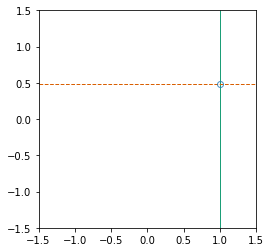

c = [ 1.11022302e-16 -1.11022302e-16] -> [0. 0.]
i = 68, y = -0.9048270524660198
g0 = 0.9999999995*x - 0.9999999995
g1 = 0.9999999995*y + 0.904827052013606


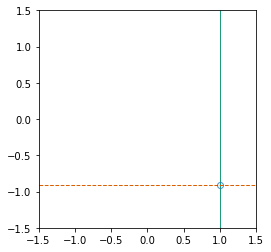

In [26]:
method = 'grad'
eps = 1e-6
chechpoints = [8, 68]

for i, Y_ in enumerate(Y):
    X = np.array([[1.0, Y_]])
    
    if i in chechpoints:
        vi = VanishingIdeal()
        vi.fit(X, eps, method=method)  # grad normalization
        Gs = vi.evaluate(np.array([[x,y]]), target='vanishing')

        print(f'i = {i}, y = {Y_}')
        for j, g in enumerate(Gs[0]):
            print(f'g{j} = {g}')
        
        vi.plot(X, splitshow=False)
        plt.show()

# 平均をゼロにするのは意外と難しい

In [114]:
B = A - np.mean(A, axis=0)
print('mean: ', np.mean(B, axis=0))

mean:  [-5.55111512e-17  2.77555756e-17]


In [115]:
B = np.eye(4) @ A - np.ones((4,4))/A.shape[0] @ A
print('mean: ', np.mean(B, axis=0))

mean:  [-5.55111512e-17  2.77555756e-17]


In [116]:
P = (np.eye(4) - np.ones((4,4))/A.shape[0])
B = P @ A
print('mean: ', np.mean(B, axis=0))

mean:  [0.0000000e+00 6.9388939e-18]


In [118]:
method = 'grad'
eps = 1e-6
chechpoints = [8, 68]

for i, Y_ in enumerate(Y):
    X = np.array([[1.0, Y_]])
    
    if i in chechpoints:
        vi = VanishingIdeal()
        vi.fit(X, eps, method=method)  # grad normalization
        Gs = vi.evaluate(np.array([[x,y]]), target='vanishing')

        print(f'i = {i}, y = {Y_}')
        for j, g in enumerate(Gs[0]):
            print(f'g{j} = {g}')
        
        vi.plot(X, splitshow=False)
        plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)